# Data Science and Computer Programming Final Project

Dataset: https://www.kaggle.com/datasets/pedroisrael/avocado-sales/data

-------------


In [61]:
%matplotlib inline
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## download dataset and read the csv file

In [62]:
path = kagglehub.dataset_download("pedroisrael/avocado-sales")
print("Path to dataset files:", path)

csv_file = os.path.join(path, 'avocado_clean.csv')
data = pd.read_csv(csv_file)

data

Using Colab cache for faster access to the 'avocado-sales' dataset.
Path to dataset files: /kaggle/input/avocado-sales


,Sale ID,Date,AveragePrice,Total Avocados,Small 4046,Extra Large 4770,Large 4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Cities
0,1,2017-03-05 00:00:00,$0.44,4973,224,0,4749,59085,639,58446,0,organic,Cincinnati Dayton
1,1,2017-02-05 00:00:00,$0.46,1750185,1200633,18325,531227,450366,113752,330583,6031,conventional,Phoenix Tucson
2,1,2017-03-05 00:00:00,$0.48,4857,718,0,4139,46034,1385,44649,0,organic,Detroit
3,1,2017-02-26 00:00:00,$0.49,4726,253,0,4473,39299,600,38699,0,organic,Cincinnati Dayton
4,1,2015-12-27 00:00:00,$0.49,1036815,738315,11642,286858,100892,70749,30143,0,conventional,Phoenix Tucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14864,1,2017-08-27 00:00:00,$3.04,5416,419,145,4852,7240,6961,279,0,organic,Raleigh Greensboro
14865,1,2017-03-12 00:00:00,$3.05,1121,1044,0,77,947,927,20,0,organic,Miami Ft Lauderdale
14866,1,2016-11-06 00:00:00,$3.12,15937,5898,0,10039,3106,3079,27,0,organic,San Francisco
14867,1,2017-04-16 00:00:00,$3.17,1338,1256,0,82,1680,1542,138,0,organic,Tampa


## pre-processing

In [63]:
data["Date"] = pd.to_datetime(data["Date"])                 # Convert the "Date" column to datetime format
data = data.sort_values(by="Date").reset_index(drop=True)   # Sort by the "Date" column and reset the index

# AveragePrice column to a float type by removing the '$' sign
data['AveragePrice'] = data['AveragePrice'].astype(str).str.replace('$', '', regex=False).astype(float)

data.head()

,Sale ID,Date,AveragePrice,Total Avocados,Small 4046,Extra Large 4770,Large 4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Cities
0,1,2015-01-04,1.49,16817,1189,0,15628,906,906,0,0,organic,Chicago
1,1,2015-01-04,1.05,269334,4967,15,264352,52490,52490,0,0,conventional,Northern New England
2,1,2015-01-04,1.05,154987,32680,1286,121021,48953,47584,1369,0,conventional,Harrisburg Scranton
3,1,2015-01-04,1.42,10124,3199,8,6917,12357,1077,11280,0,organic,Denver
4,1,2015-01-04,1.20,165422,53316,39928,72178,55664,44041,11623,0,conventional,Raleigh Greensboro


## Check if there are missing values
no missing values!

In [64]:
print(f"Number of instances = {data.shape[0]}")
print(f"Number of attributes = {data.shape[1]}")

print("Number of missing values:")
for col in data.columns:
    print(f"    {col}: {data[col].isna().sum()}  \t(type:{data[col].dtype})")

Number of instances = 14869
Number of attributes = 13
Number of missing values:
    Sale ID: 0  	(type:int64)
    Date: 0  	(type:datetime64[ns])
    AveragePrice: 0  	(type:float64)
    Total Avocados: 0  	(type:int64)
    Small 4046: 0  	(type:int64)
    Extra Large 4770: 0  	(type:int64)
    Large 4225: 0  	(type:int64)
    Total Bags: 0  	(type:int64)
    Small Bags: 0  	(type:int64)
    Large Bags: 0  	(type:int64)
    XLarge Bags: 0  	(type:int64)
    type: 0  	(type:object)
    Cities: 0  	(type:object)


## Visualization

1. Filtering information on organic avocados in the Chicago area

Number of data entries: 169


,Sale ID,Date,AveragePrice,Total Avocados,Small 4046,Extra Large 4770,Large 4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Cities
0,1,2015-01-04,1.49,16817,1189,0,15628,906,906,0,0,organic,Chicago
103,1,2015-01-11,1.79,12327,1427,0,10900,589,589,0,0,organic,Chicago
209,1,2015-01-18,1.81,11986,1155,0,10831,514,514,0,0,organic,Chicago
332,1,2015-01-25,1.83,10227,712,0,9515,724,724,0,0,organic,Chicago
416,1,2015-02-01,1.52,13198,1363,0,11835,1192,1192,0,0,organic,Chicago


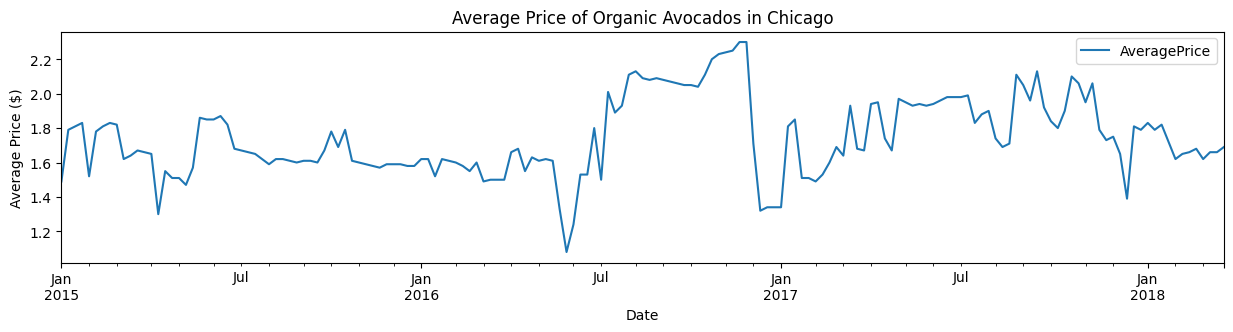

In [65]:
chicago_data = data[(data['Cities'] == 'Chicago') & (data['type'] == 'organic')]

print(f"Number of data entries: {len(chicago_data)}")

ax = chicago_data.plot(
    x='Date',
    y='AveragePrice',
    kind='line',
    figsize=(15, 3)
)

ax.set(
    title='Average Price of Organic Avocados in Chicago',
    xlabel='Date',
    ylabel='Average Price ($)'
)
chicago_data.head()

2. Calculate the average price for all regions daily and plot the overall price trend.

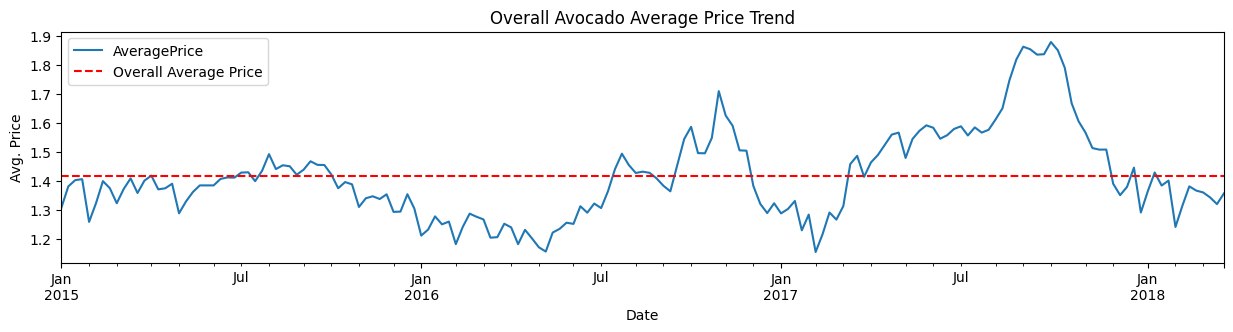

In [66]:
overall_price_trend = data.groupby('Date')['AveragePrice'].mean()
ax = overall_price_trend.plot(kind='line', figsize=(15, 3))


# Calculate the overall average price
overall_avg_price = data['AveragePrice'].mean()

# Add the overall average price as a horizontal red dashed line
ax.axhline(overall_avg_price, color='red', linestyle='--', label='Overall Average Price')

ax.set(
    title = 'Overall Avocado Average Price Trend',
    xlabel = 'Date',
    ylabel = 'Avg. Price'
)
plt.legend()
plt.show()

3. Compare the average price trends of organic avocados and conventional avocados.

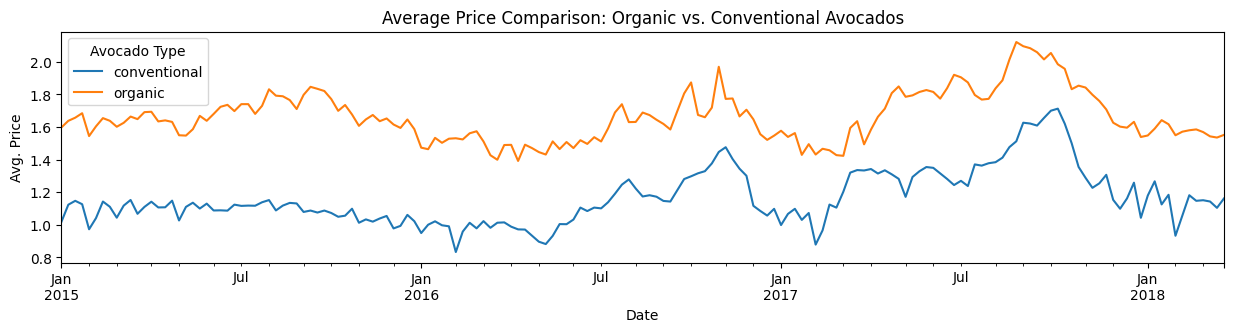

In [67]:
avg_price_by_type = data.groupby(['Date', 'type'])['AveragePrice'].mean()
avg_price_by_type = avg_price_by_type.unstack()
ax = avg_price_by_type.plot(kind='line', figsize=(15, 3))

ax.set(
    title = 'Average Price Comparison: Organic vs. Conventional Avocados',
    xlabel = 'Date',
    ylabel = 'Avg. Price'
)
plt.legend(title='Avocado Type')
plt.show()

4. Calculate the total sales for each city, identify the top 10, and create a bar chart

Cities
Los Angeles             339632002
New York City           172739955
Dallas Ft Worth         161949529
Phoenix Tucson          156735077
Houston                 152952804
San Francisco           120939257
Chicago                 116836904
West Tex New Mexico     109225302
Baltimore Washington     99407764
Denver                   79945538
Name: Total Avocados, dtype: int64


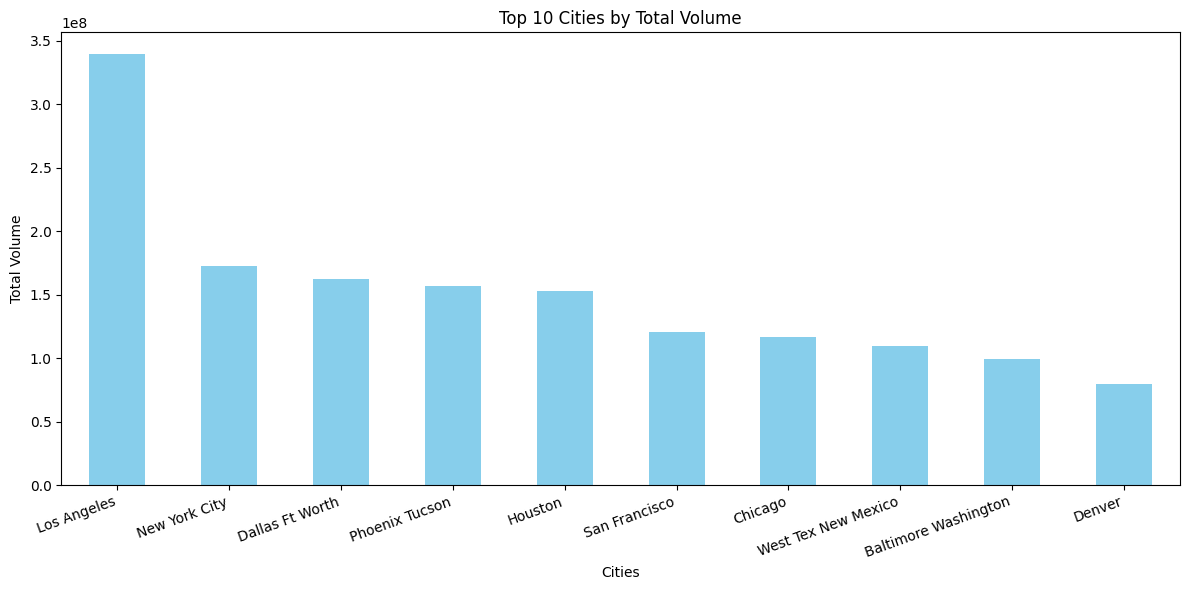

In [68]:
top_cities = data.groupby('Cities')['Total Avocados'].sum()
top_cities = top_cities.nlargest(10)
print(top_cities)

plt.figure(figsize=(12, 6))
ax = top_cities.plot(kind='bar', color='skyblue')
ax.set(
    title = 'Top 10 Cities by Total Volume',
    xlabel = 'Cities',
    ylabel = 'Total Volume'
)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()